In [1]:
import xgboost as xgb
import pandas as pd

In [6]:
df = pd.read_parquet("../Dataset/test.parquet")
df = df.drop("id", axis=1)

In [ ]:
model_path = r"..\Models\xgbfoost_model.json"
model = xgb.XGBClassifier()
model.load_model(model_path)

In [9]:
y_test = model.predict(df)

In [12]:
len(y_test)

521280

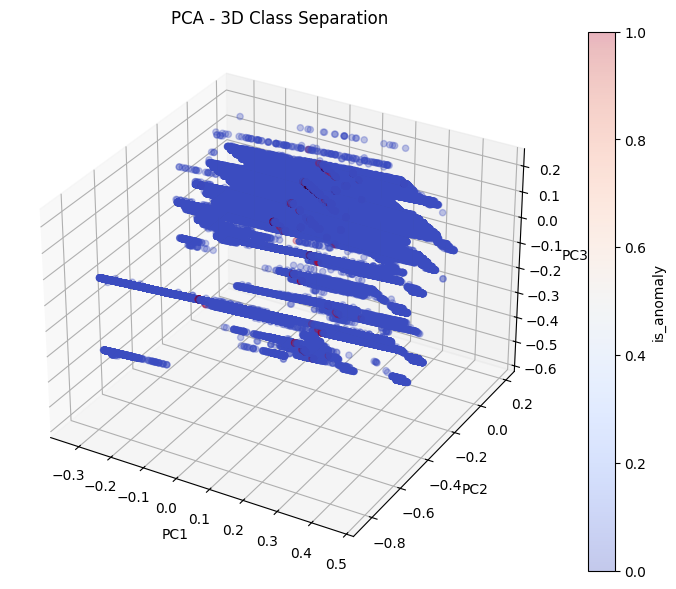

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
X_proj = pca.fit_transform(df)

# Plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], c=y_test, cmap='coolwarm', alpha=0.3)

ax.set_title("PCA - 3D Class Separation")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.colorbar(sc, label='is_anomaly')
plt.show()